# Synthetic problem example

In [1]:
from testproblems import generate_random_prob, random_problem_with_artifacts
from datastructures.operators import invert_edges, sort_scc, reformulate
from datastructures.rendering import render_incidence
from datastructures.tearing import min_arc_set_assign,dir_graph
from datastructures.graphutils import edges_to_Ein_Eout, sources
from datastructures.polycasebuilder import eqv_to_edges_tree
import networkx as nx
import numpy as np
from itertools import chain

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [3]:
m,n,seed,sparsity = 3,5,10,1.

In [4]:
kwargs = random_problem_with_artifacts(m,n,seed,sparsity)
eq_incidence,outset,eqnidxs,edges_varonleft,varidxs = map(kwargs.get, ["eq_incidence","outset","eqnidxs","edges_varonleft","varidxs"])

In [5]:
edges_default,tree_default,new_outset = eqv_to_edges_tree(eq_incidence, outset, len(eqnidxs))

### Arguments for HSM

In [6]:
vizargs = {'save':False, 'figsize':((3,3)), 'fontsize':22, 'rotation':0, 'hideticks':True, 'patchwidth':4}

## Starting incidence

In [7]:
edges_undir,tree_undir,_ = eqv_to_edges_tree(eq_incidence, n_eqs=m)
edges_dir,tree_dir,outset_adj = eqv_to_edges_tree(eq_incidence, outset, n_eqs=m)
tree_undir[2].update({val:1 for val in outset_adj.values()})

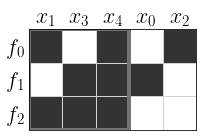

In [8]:
render_incidence(edges_undir, tree_undir, **vizargs);

## Incidence of objective function

In [9]:
xsol, m = min_arc_set_assign(edges_varonleft, varidxs, eqnidxs)
outset_opt = dict((right, left) for left, right in edges_varonleft if xsol[left, right] > 0.5)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-02-25


In [10]:
edges_opt, tree_opt, new_outset_opt = eqv_to_edges_tree(eq_incidence, outset_opt, len(eqnidxs))

First we find input variables of the reformulated problem

In [11]:
inputids = sources(*edges_to_Ein_Eout(edges_opt))

In [12]:
D = nx.DiGraph(dir_graph(edges_varonleft, eqnidxs, outset.items()))
tree_opt = [{elt:2 for elt in chain(*sort_scc(D, lambda x: x in eqnidxs))},{2:1},{v:2 for v in inputids}]

### Add incidence of objective function to new formulation

In [13]:
newidx = 'obj'
edges_opt[0][newidx] = tuple(inputids)
edges_opt[1][newidx] = (None,)
tree_opt[0][newidx] = 2

In [14]:
tree_opt

[{0: 2, 1: 2, 2: 2, 'obj': 2}, {2: 1}, {2: 2, 4: 2}]

In [15]:
formulation_opt = reformulate(edges_opt, tree_opt, root_solver_name=1)

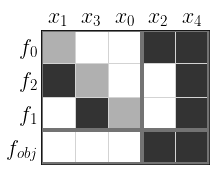

In [16]:
render_incidence(*formulation_opt, figname="defense_synthetic_opt.png", **vizargs);

### Add incidence of objective function to original formulation

In [17]:
inputids_default = {v:1 for v in sources(*edges_to_Ein_Eout(edges_dir))}
undir_vars = {val:2 for val in outset_adj.values()}
tree_default = ({elt:2 for elt in eqnidxs},{2:1},undir_vars | inputids_default)
edges_undir[0][newidx] = tuple(inputids)
edges_undir[1][newidx] = (None,)
tree_default[0][newidx] = 1

In [18]:
tree_default

({0: 2, 1: 2, 2: 2, 'obj': 1}, {2: 1}, {3: 2, 4: 2, 1: 2, 0: 1, 2: 1})

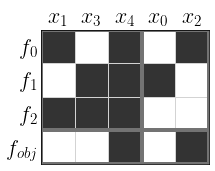

In [19]:
render_incidence(edges_undir, tree_default, figname="defense_synthetic_init.png", **vizargs);